In [78]:
# Import libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt

In [79]:
# Load dataset
df = pd.read_csv('./Christmas Sales and Trends.csv')
df.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,...,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
0,1,12/24/2020,7:27:59,441,27,Other,City_15,NaN,True,106,...,Credit Card,False,0.0,False,Standard,5.0,Snowy,NaN,5,False
1,2,11/18/2022,14:36:39,340,43,Male,City_13,NaN,True,816,...,Credit Card,True,0.0,True,Express,3.0,Sunny,NaN,2,True
2,3,12/26/2019,20:23:50,31,25,Other,City_7,92.0,False,508,...,Credit Card,False,0.0,False,NaN,NaN,Rainy,Christmas Market,4,False
3,4,11/13/2018,23:08:08,39,64,Male,City_20,100.0,False,710,...,Debit Card,False,0.0,True,NaN,NaN,Rainy,NaN,1,True
4,5,12/13/2020,4:38:08,344,26,Other,City_10,90.0,False,687,...,Cash,False,0.0,True,NaN,NaN,Sunny,Christmas Market,4,False


In [80]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 TransactionID              0
Date                       0
Time                       0
CustomerID                 0
Age                        0
Gender                     0
Location                   0
StoreID                 5418
OnlineOrderFlag            0
ProductID                  0
ProductName                0
Category                   0
Quantity                   0
UnitPrice                  0
TotalPrice                 0
PaymentType                0
PromotionApplied           0
DiscountAmount             0
GiftWrap                   0
ShippingMethod          4582
DeliveryTime            4582
Weather                    0
Event                   2838
CustomerSatisfaction       0
ReturnFlag                 0
dtype: int64


In [81]:
# Function to analyze customer behavior
def analyze_customer_behavior(customer_id):
    
    """Analyzes the buying behavior of a single customer using the FP-Growth algorithm."""

    customer_df = df[df['CustomerID'] == customer_id]
    
    grouped_df = customer_df.groupby('TransactionID')['ProductName'].apply(list)
    transactions = grouped_df.tolist()

    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    transformed_df = pd.DataFrame(te_ary, columns=te.columns_)

    frequent_itemsets = fpgrowth(transformed_df, min_support=0.05, use_colnames=True)
    return frequent_itemsets

In [82]:
# Example of analyze customer behavior
customer_1 = analyze_customer_behavior(1)
customer_2 = analyze_customer_behavior(10)
customer_3 = analyze_customer_behavior(100)
customer_4 = analyze_customer_behavior(200)

In [83]:
# Function to visualize
def visualize(frequent_itemsets, customer_id):

    """Creates a bar plot of the frequent itemsets for a given customer."""

    frequent_itemsets['itemset_size'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    frequent_itemsets['support'] *= 100
    
    plt.figure(figsize=(10, 6))
    plt.bar(frequent_itemsets['itemsets'].astype(str), frequent_itemsets['support'])
    plt.xlabel('Itemsets')
    plt.ylabel('Support (%)')
    plt.title(f'Frequent Itemsets for Customer {customer_id}')
    plt.xticks(rotation=45)
    plt.show()

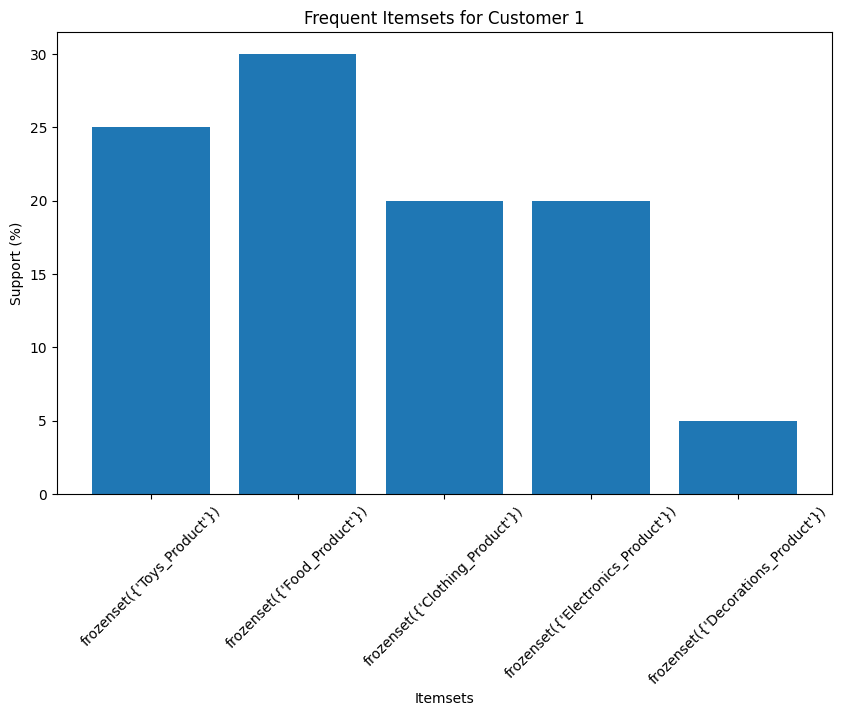

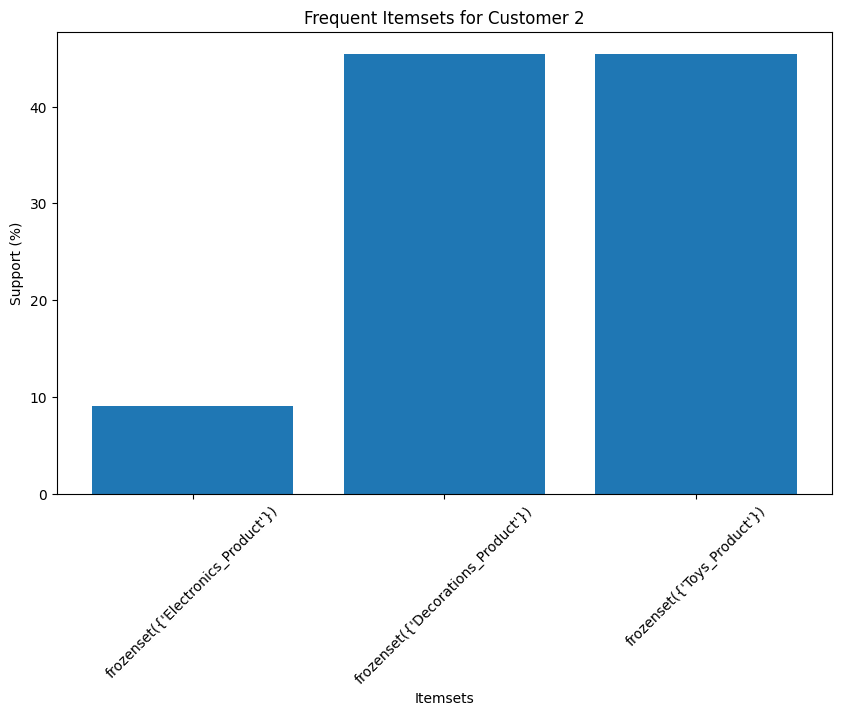

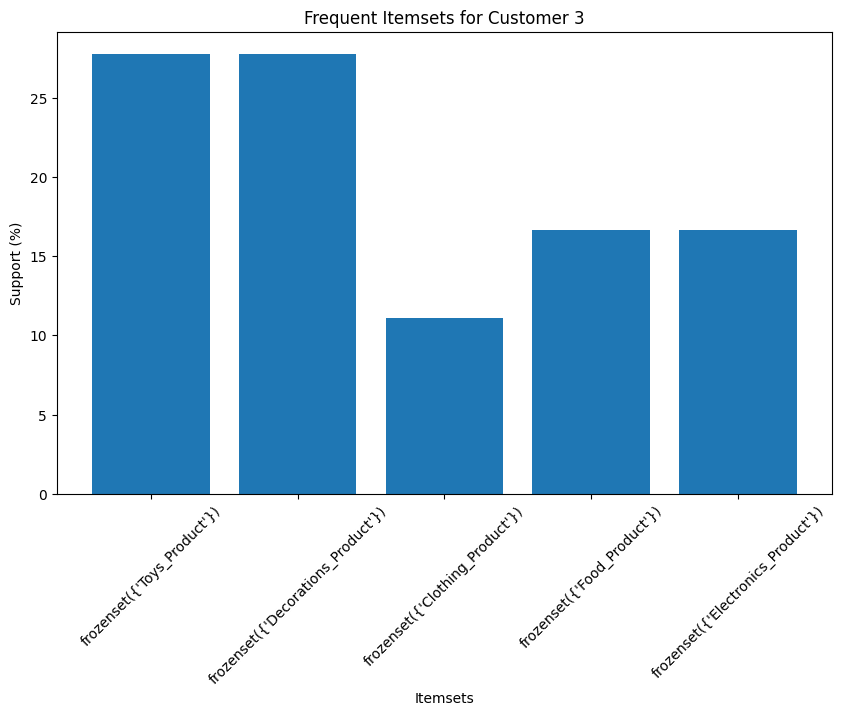

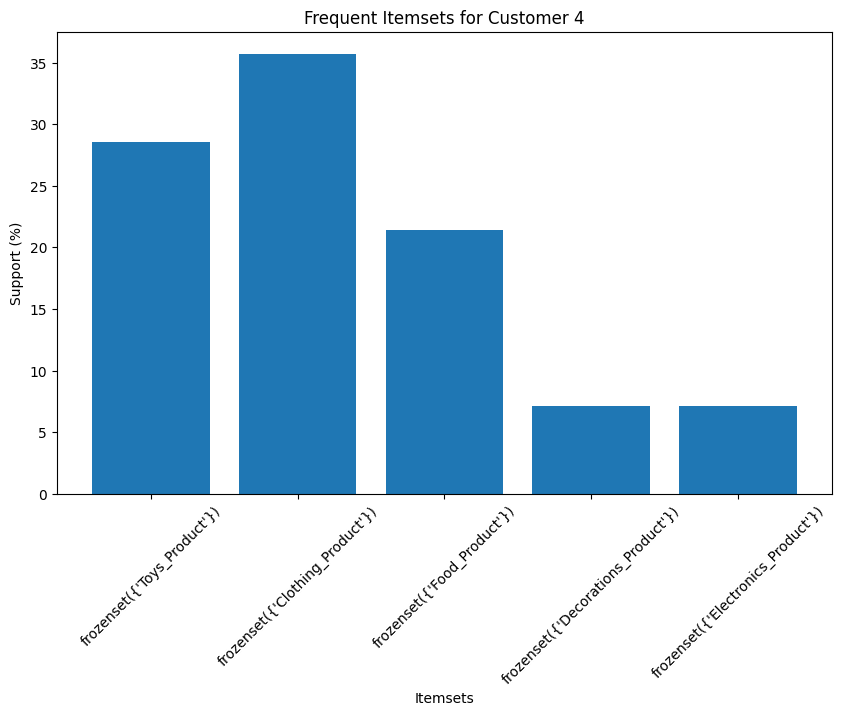

In [84]:
visualize(customer_1, 1)
visualize(customer_2, 2)
visualize(customer_3, 3)
visualize(customer_4, 4)